In [1]:
# http://www.ee.iitm.ac.in/~nitin/teaching/ee5480/firdesign.html

In [10]:
# Import a lot of functions to keep it simple to use
from pylab import * 
import matplotlib.pyplot as plt

In [11]:
# parameters
fs = 1000   # [Hz]
Ts = 1.0/fs # [s]

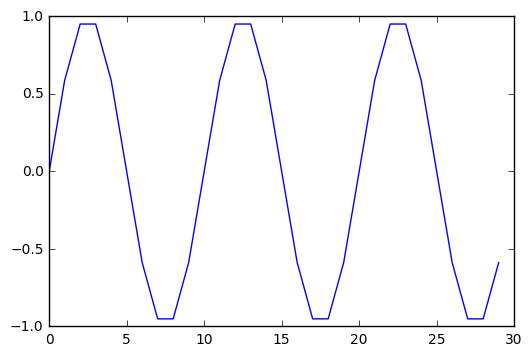

In [13]:
# 1 second of data samples at spacing of 1/1000 seconds
t = arange(0, 1, Ts)
#t = arange(0, 1.001, Ts)

# sine wave of 100 Hz
s1 = sin(2*pi*100*t)

# plot first 20 points of the resulting data (why not all 1000?)
plt.plot(s1[:30])
plt.show()

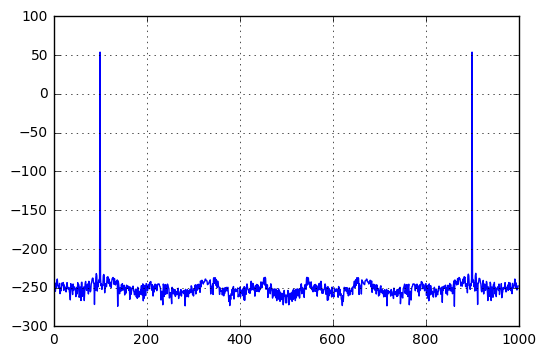

In [17]:
# Note: you may need to use fft.fft is you are using ipython
ft = fft(s1)#/len(s1)
plt.plot(20*log10(abs(ft)))
plt.show()

In [ ]:
# Another signal with two sine waves
s2 = sin(2*pi*100*t)+sin(2*pi*200*t)

plt.plot(s2[:30])
plt.show()

In [ ]:
# Note: you may need to use fft.fft is you are using ipython
ft = fft(s2)/len(s2)

plt.plot(20*log10(abs(ft)))
plt.show()

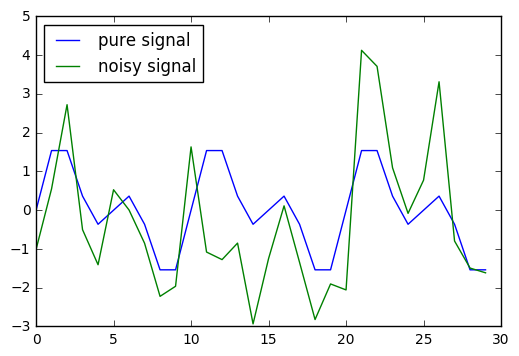

In [18]:
# adds some noise
noise_amp = 1.5
s_pure = sin(2*pi*100*t) + sin(2*pi*200*t)

s = s_pure + noise_amp*randn(len(t))

plt.plot(s_pure[:30])
plt.plot(s[:30])
plt.legend(('pure signal', 'noisy signal'), loc='best')
plt.show()

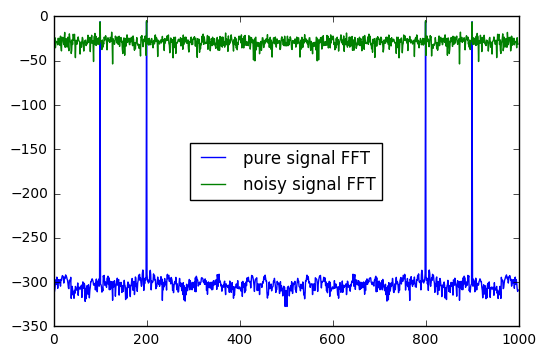

In [20]:
ft_pure = fft(s_pure)/len(s_pure)
ft = fft(s)/len(s)

plt.plot(20*log10(abs(ft_pure)))
plt.plot(20*log10(abs(ft)))
plt.legend(('pure signal FFT', 'noisy signal FFT'), loc='best')
plt.show()

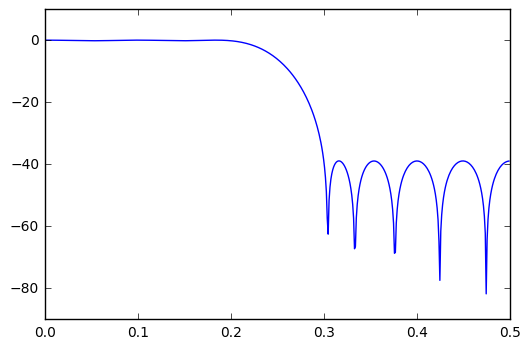

In [21]:
# filter design Remez algorithm
from scipy.signal import remez
lpf1 = remez(21, [0, 0.2, 0.3, 0.5], [1.0, 0.0])

from scipy.signal import freqz
w, h = freqz(lpf1)

plt.plot(w/(2*pi), 20*log10(abs(h))) # w/(2*pi) normalizes X-axis, resulting in 0.5 --> pi
plt.show()

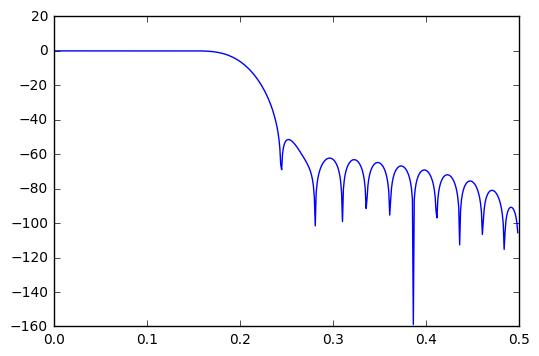

In [22]:
# filter design FIR window algorithm
from scipy.signal import firwin
lpf2 = firwin(numtaps=40, cutoff=0.4, window='hamming') # cutoff is a fraction of Nyquist frequency

from scipy.signal import freqz
w, h = freqz(lpf2)

plt.plot(w/(2*pi), 20*log10(abs(h)))
plt.show()

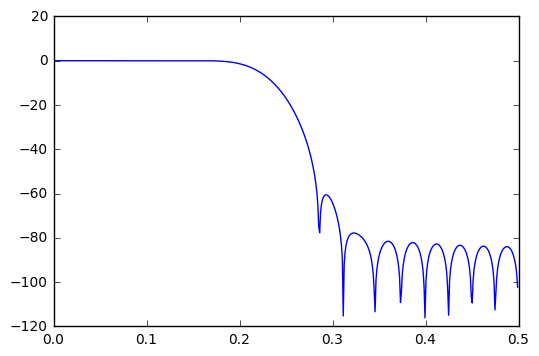

In [23]:
# filter design FIR window 2 algorithm
from scipy.signal import firwin2
lpf3 = firwin2(40, [0.0, 0.4, 0.5, 1.0], [1.0, 1.0, 0.0, 0.0], window='hamming') # cutoff is a fraction of Nyquist frequency

from scipy.signal import freqz
w, h = freqz(lpf3)

plt.plot(w/(2*pi), 20*log10(abs(h)))
plt.show()

## Filtering with `lfilter`

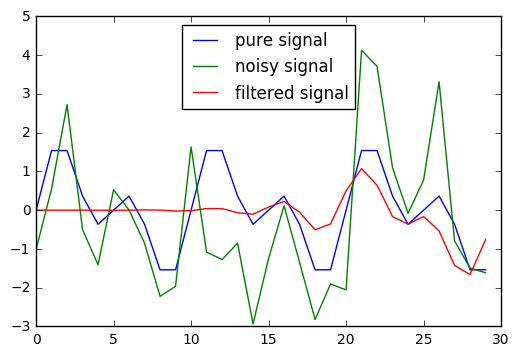

In [32]:
# filtering the signal with lfilter
from scipy.signal import lfilter

sout = lfilter(lpf3, 1, s)

plt.plot(s_pure[:30])
plt.plot(s[:30])
plt.plot(sout[:30])
legend(('pure signal', 'noisy signal', 'filtered signal'), loc='best')
plt.show()

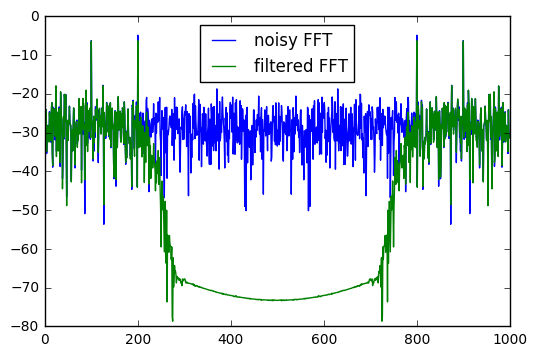

In [33]:
ft = fft(s)/len(s)
ftout = fft(sout)/len(sout)

plt.plot(20*log10(abs(ft)))
plt.plot(20*log10(abs(ftout)))
legend(('noisy FFT', 'filtered FFT'), loc='best')
plt.show()

## Filtering with `filtfilt`
Linear phase, without delay.

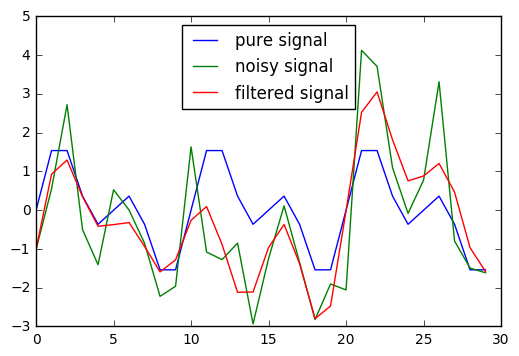

In [34]:
# filtering the signal with filtfilt
from scipy.signal import filtfilt

sout = filtfilt(lpf3, 1, s)

plt.plot(s_pure[:30])
plt.plot(s[:30])
plt.plot(sout[:30])
legend(('pure signal', 'noisy signal', 'filtered signal'), loc='best')
plt.show()

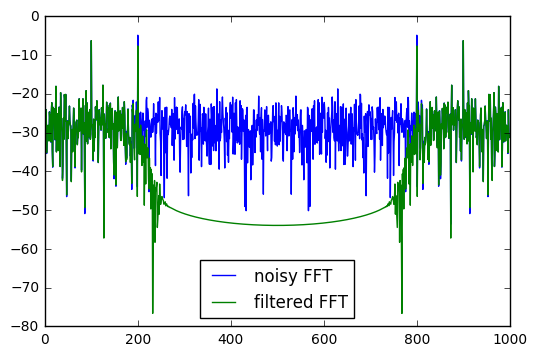

In [35]:
ft = fft(s)/len(s)
ftout = fft(sout)/len(sout)

plt.plot(20*log10(abs(ft)))
plt.plot(20*log10(abs(ftout)))
legend(('noisy FFT', 'filtered FFT'), loc='best')
plt.show()